## Why are we developing scenarios?
The **district heat temperatures** usually take values above 80 degrees, which means that the energy companies have to create a lot of energy to heat it. We would like to synthesize data of the **district heat temperature values**, below 80 degrees, with the values that have not appeared in real life, and see how the energy and temperature models will react.

## What is the catch?
It is important to understand how the system works. For instance, the energy comes to building in the form of the **district heat water**, which is then fed to different HVAC subsystems like **radiator**, **ventilation** and **floor networks**. After these systems have been heated with this water, the water comes out of the building back to the energy supplier, and the difference in the incoming and outgoing water temperature is the basis for calculating the energy bill.

Given that, regarding the potential scenarios, it becomes obvious that the **district heat temperature** must be higher than the water in the subsystems. Also, from the plots below it can be seen that the the systems behave somewhat differently in comparison to the changing **district heat temperature**. Thus, what we try to do, is simulate the scenarios, when we reduce the **district heat temperature**, but also keep the relationship between the **district heat** and other subsystems somewhat natural and consistent.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
pd.options.mode.chained_assignment = None

In [24]:
raw_data = pd.read_csv(r'C:\Users\romat\Documents\GitHub\HAMK_Smart_City\s-building_data.csv')

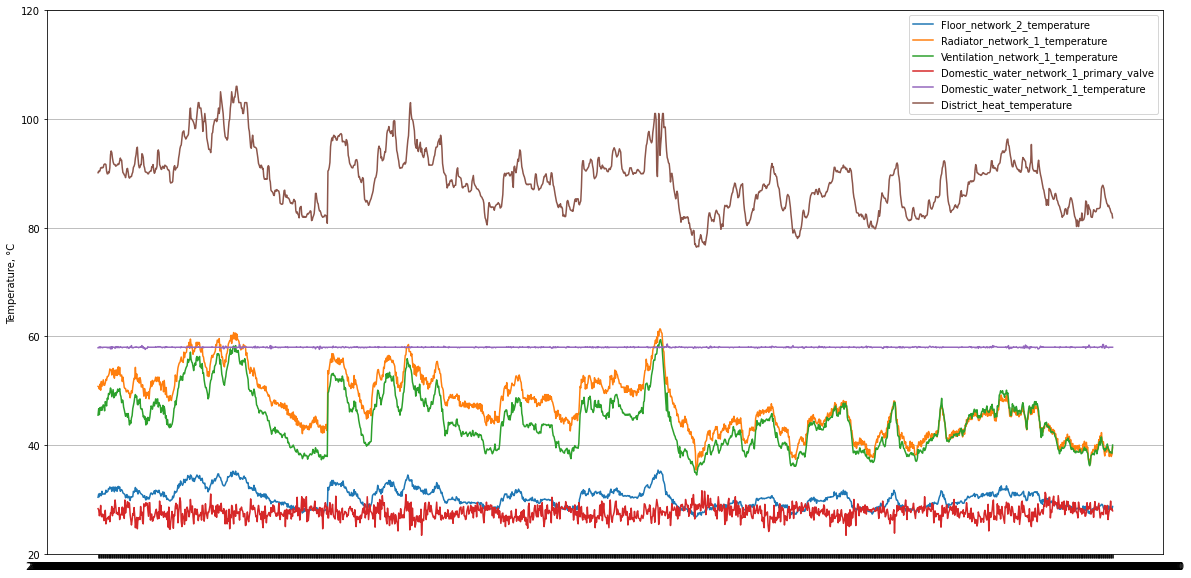

In [25]:
# Plot the temperature values of different HVAC subsystems
plt.figure(figsize = (20, 10))
plt.plot("Time", "Floor_network_2_temperature", label = "Floor_network_2_temperature", data = raw_data)
plt.plot("Time", "Radiator_network_1_temperature", label = "Radiator_network_1_temperature", data = raw_data)
plt.plot("Time", "Ventilation_network_1_temperature", label = "Ventilation_network_1_temperature", data = raw_data)
plt.plot("Time", "Domestic_water_network_1_primary_valve", label = "Domestic_water_network_1_primary_valve", data = raw_data)
plt.plot("Time", "Domestic_water_network_1_temperature", label = "Domestic_water_network_1_temperature", data = raw_data)
plt.plot("Time", "District_heat_temperature", label = "District_heat_temperature", data = raw_data)
plt.ylim(20, 120)
plt.ylabel("Temperature, °C")
plt.legend()
plt.grid(axis = "y")
plt.show()

It is quite clear that the relationship between the **district heat temperature** and the **ventilation** and **radiator** networks is quite highly linear, as the all three lines rise and fall in tact. The **floor network temperature** is also somewhat respondent to the changes in the **district heat temperatures**, but on a lesser scale. **Domestic water temperature**, on the other hand, is kept highly constant within 57.6 and 58.6 degrees, and thus does not seem to have a relationship with **district heat temperature**, besides simply being smaller.

In [26]:
#Research relationship between the district heating water temperature and temperatures in other systems
relationships = raw_data[["Time", "Floor_network_2_temperature", "Radiator_network_1_temperature", 
                          "Ventilation_network_1_temperature", "District_heat_temperature", 
                          "Domestic_water_network_1_primary_valve", "Domestic_water_network_1_temperature"]]
for column in ["Floor_network_2_temperature", 
               "Radiator_network_1_temperature", 
               "Ventilation_network_1_temperature", 
               "Domestic_water_network_1_primary_valve", 
               "Domestic_water_network_1_temperature"]:
    relationships[column] = relationships[column] / relationships["District_heat_temperature"]
relationships["District_heat_temperature"] = relationships["District_heat_temperature"] / 100

## Future ideas
Use the values from the relationships distributions to create the truthful values of the subsystems temperatures in regard to the district heat temperatures. However, it is important to understand the flow of the water in the systems so that the values are not only truthful from the relationships and distribution points of view, but also from the point of how the system works.